In [1]:
import scanpy as sc
from scperturb import edist, pairwise_pca_distances, equal_subsampling
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from tqdm import tqdm
from muon import prot as pt
import matplotlib
from cycler import cycler
import math
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
from sklearn.metrics import pairwise_distances
from statsmodels.stats.multitest import multipletests

from scipy.stats import zscore
from scipy.cluster.hierarchy import distance, linkage, dendrogram
from scipy.cluster import hierarchy

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from pyWNN import pyWNN


# WNN using Dylan Kotliar's implementation https://github.com/dylkot/pyWNN


In [2]:
def cluster_matrix(matrix, how='row', return_order=False, method='centroid'):
    '''
    Hierarchical clustering of a matrix/dataframe. `how` can be 'col', 'row' or 'both' (default: 'row').
    '''
    if how not in ['col', 'row', 'both']:
        raise ValueError('Value for "how" must be row or col.')
    if how!='both':
        M = matrix if how=='row' else matrix.T
        dist = distance.pdist(M)
        link = linkage(dist, method=method)
        dend = dendrogram(link, no_plot=True)
        order = np.array(dend['leaves'], dtype=int)
        if return_order:
            return order
        elif isinstance(matrix, pd.DataFrame):
            return matrix.iloc[order] if how=='row' else matrix.iloc[:, order]
        else:
            return matrix[order] if how=='row' else matrix[:, order]
    else:
        if return_order:
            warn('Returning order when clustering both row and col is not supported.')
        matrix_ = cluster_matrix(matrix, how='row', return_order=False, method=method)
        return cluster_matrix(matrix_, how='col', return_order=False, method=method)
    


In [3]:
pbmc = sc.read_h5ad("/Users/tessa/Dropbox (HMS)/perturb_resource_tessa/pbmc/rna_only.h5ad")



In [32]:
pbmc.layers['counts'] = pbmc.X.copy()

# basic qc and pp
sc.pp.filter_cells(pbmc, min_counts=1000)
sc.pp.normalize_per_cell(pbmc)
sc.pp.filter_genes(pbmc, min_cells=50)

n_var_max = 2000  # max total features to select
sc.pp.highly_variable_genes(pbmc, n_top_genes=n_var_max, subset=False, flavor='seurat_v3', layer='counts')
sc.pp.log1p(pbmc)

sc.pp.pca(pbmc, use_highly_variable=True)
sc.pp.neighbors(pbmc)

pbmc.uns['processed'] = True

In [33]:
sc.tl.umap(pbmc)

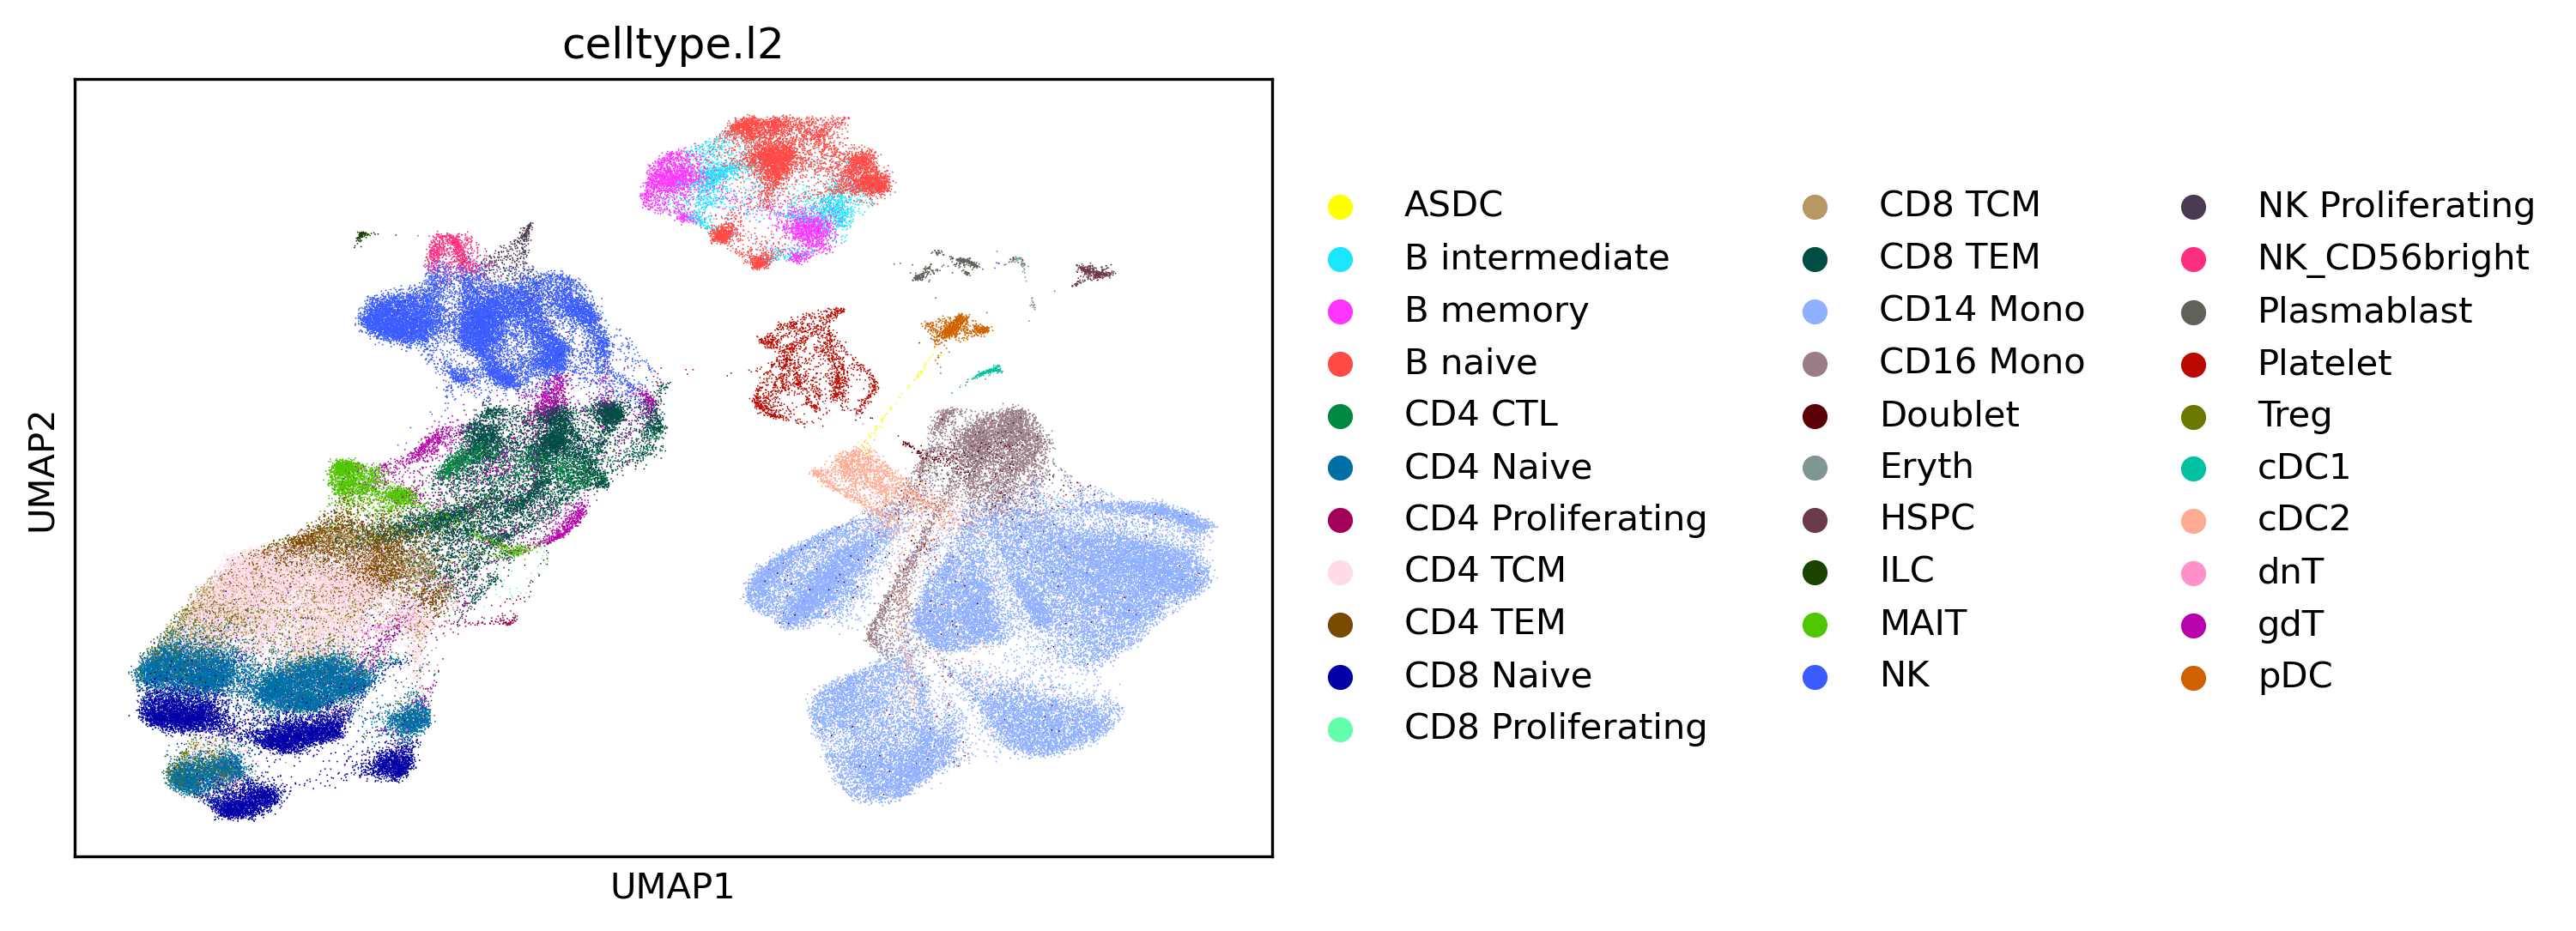

In [34]:
sc.pl.umap(pbmc, color = "celltype.l2")

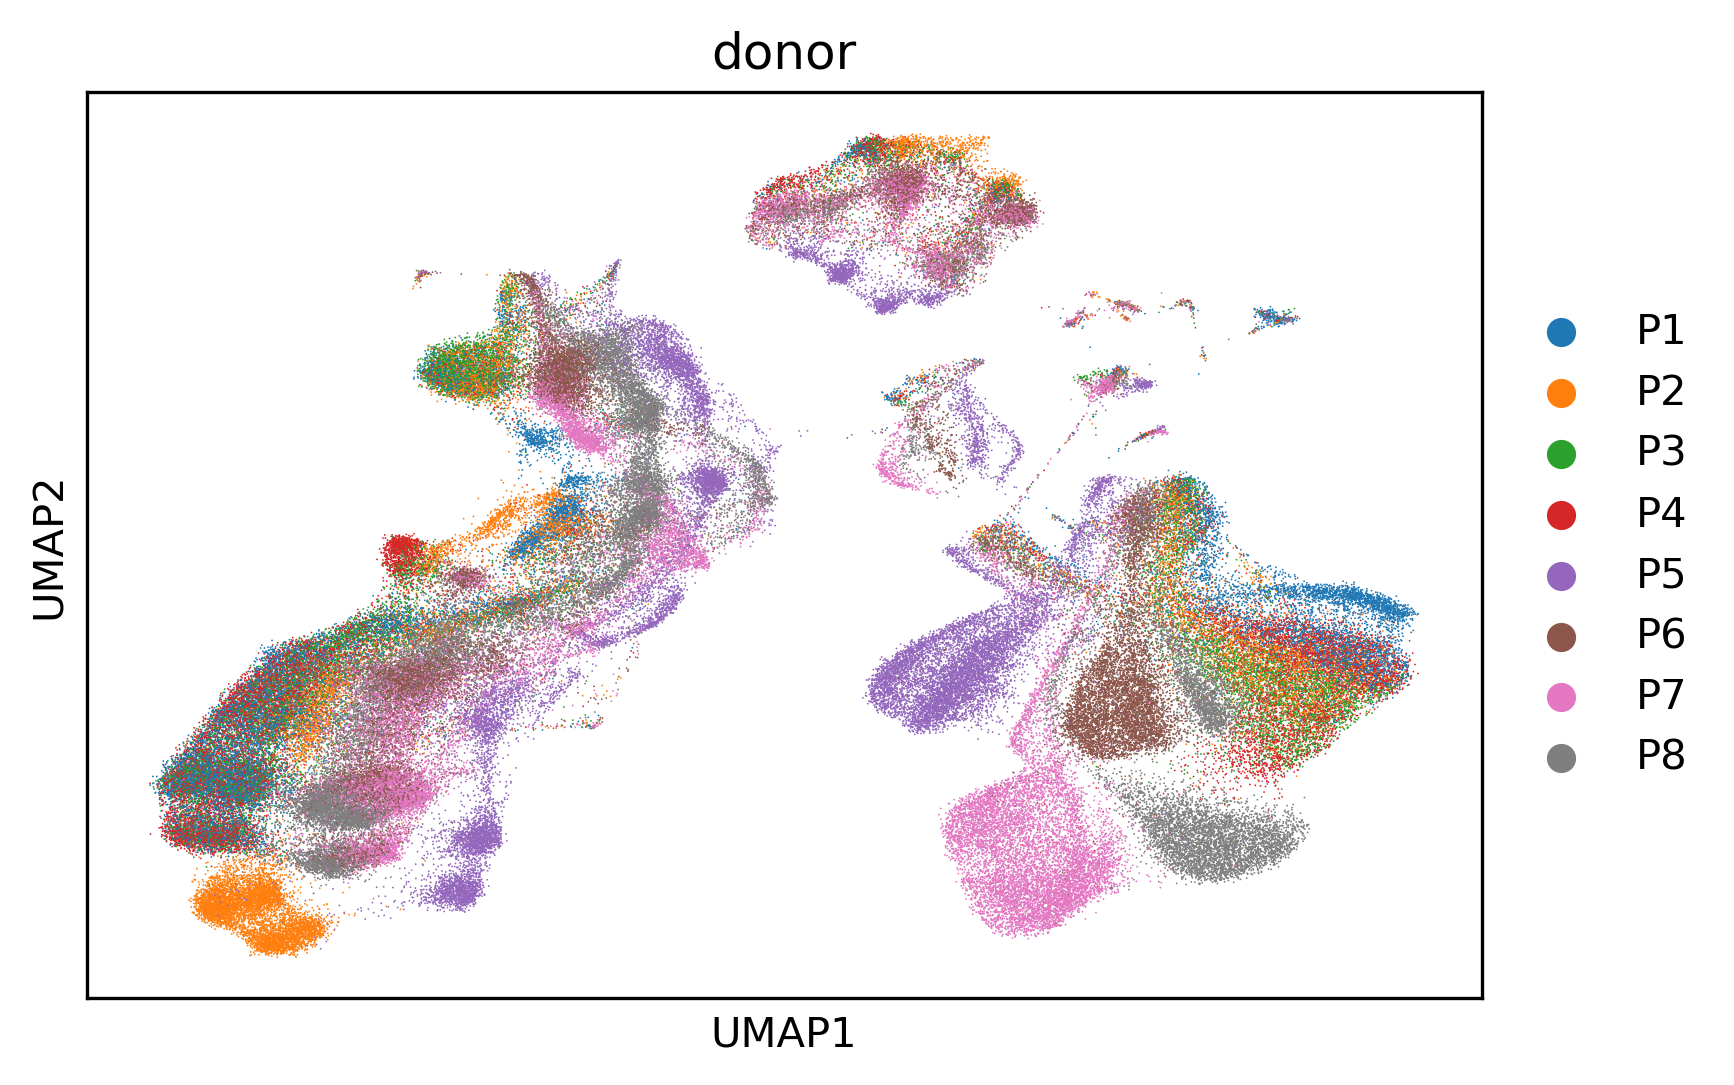

In [36]:
sc.pl.umap(pbmc, color = "donor")

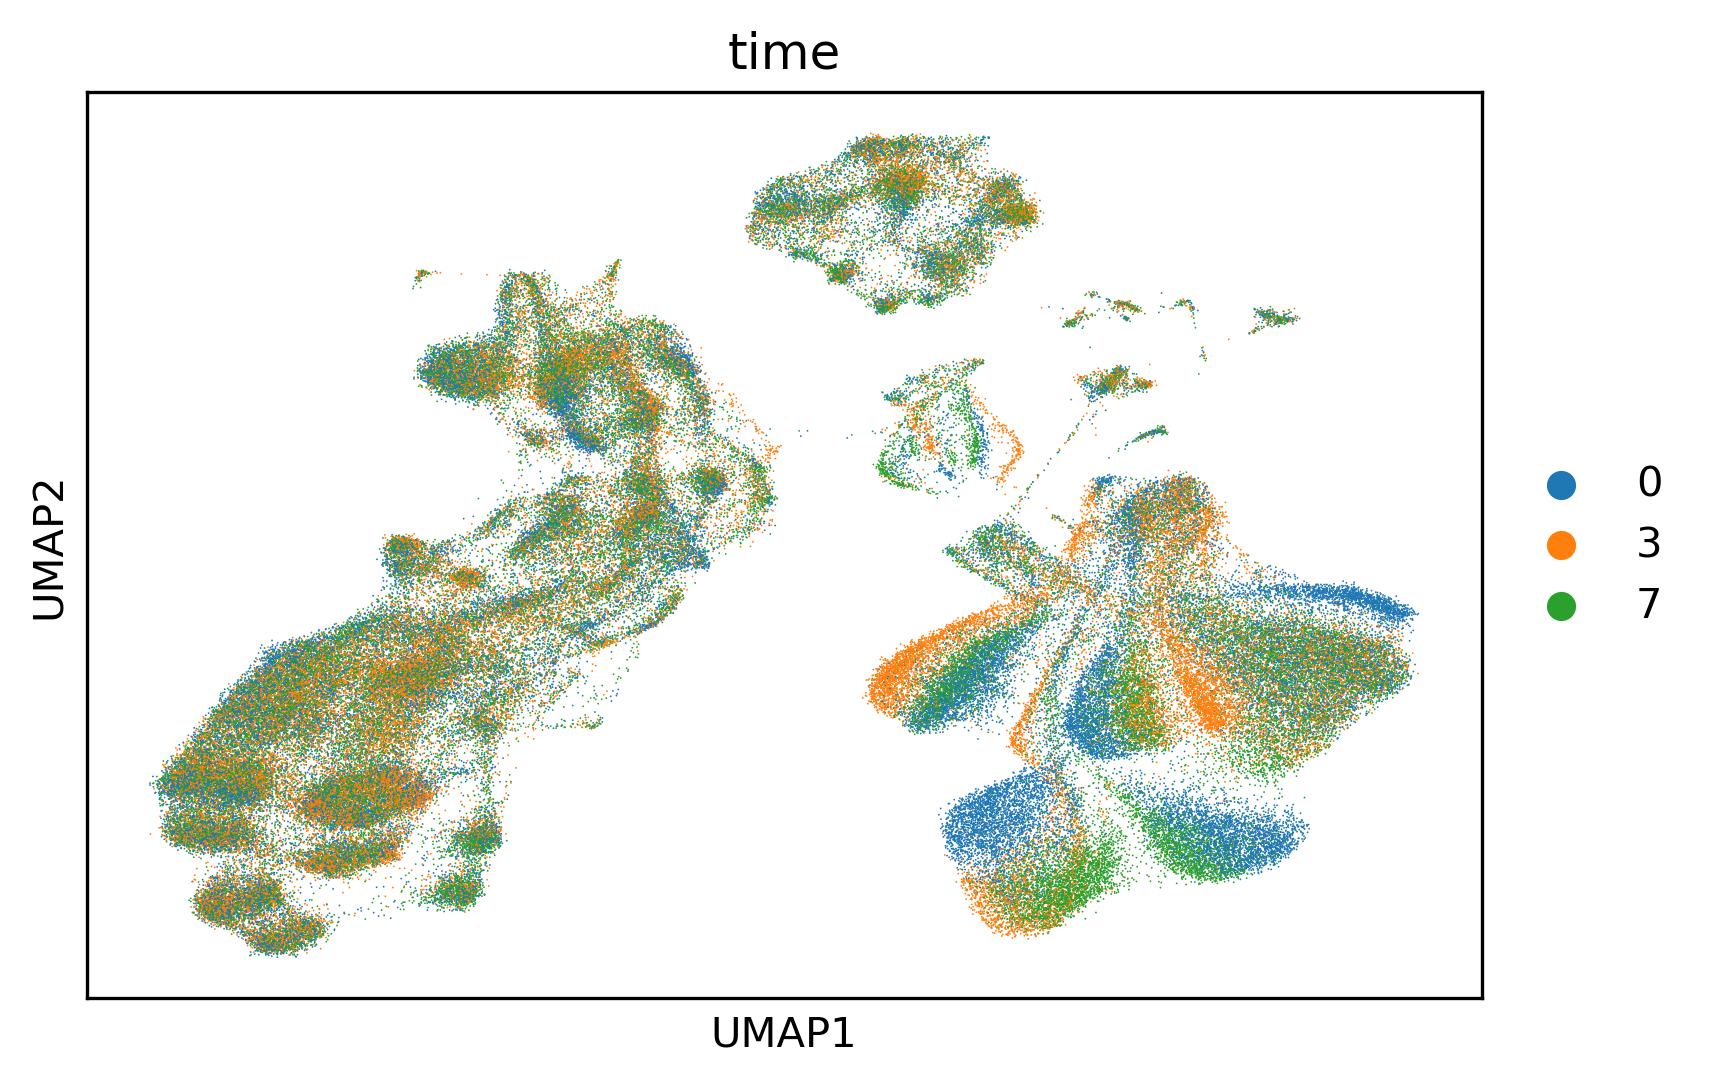

In [37]:
sc.pl.umap(pbmc, color = "time")

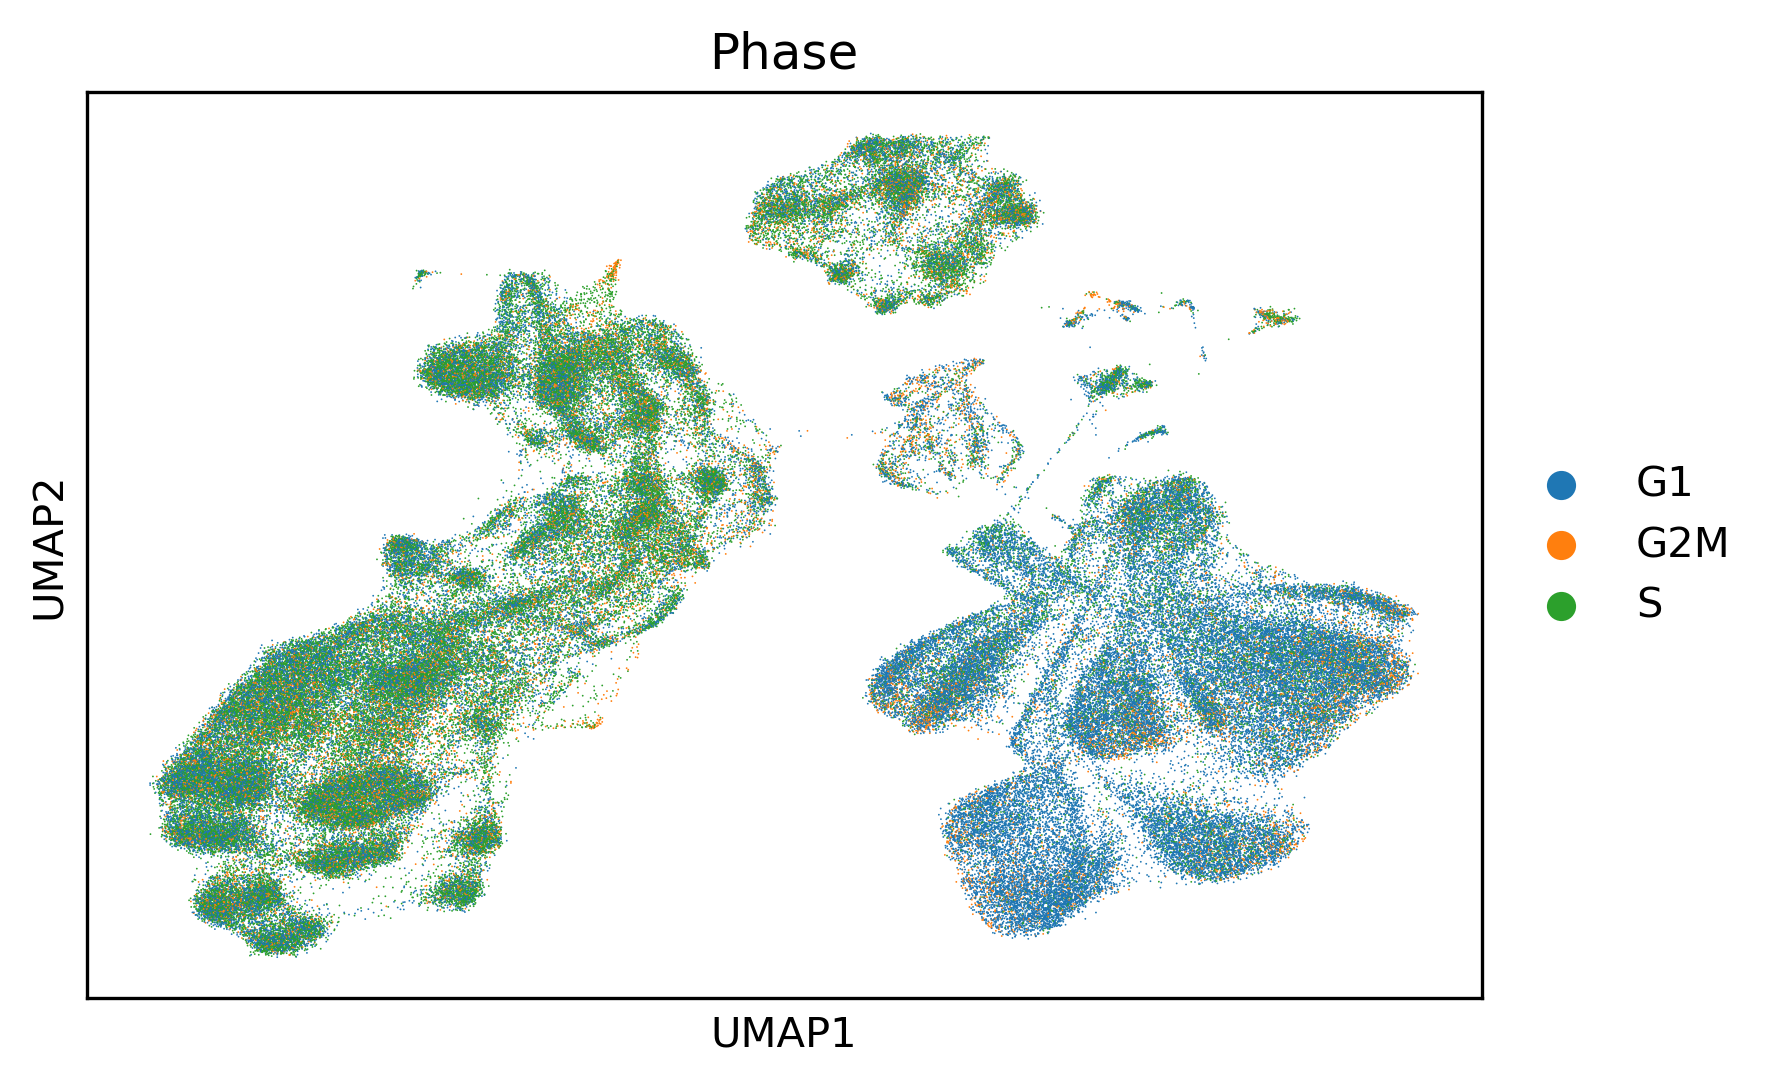

In [38]:
sc.pl.umap(pbmc, color = "Phase")